<a href="https://colab.research.google.com/github/brenoskuk/recvis/blob/main/SinGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SinGan project

## MVA RecVis

### Collaborators: Breno Skuk and Claudia Torres Pérez

# 1. Getting started:

First download necessary files and dependencies

In [34]:
from google.colab import files
import matplotlib.pyplot as plt 
from skimage.io import imread
import cv2
import numpy as np
import os
from IPython.display import clear_output

In [1]:
!git clone https://github.com/brenoskuk/recvis.git

Cloning into 'recvis'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 903 (delta 12), reused 0 (delta 0), pack-reused 835
Receiving objects: 100% (903/903), 112.64 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (165/165), done.


We need to change into the correct directory, then we install the required libraries

In [2]:
%cd recvis/

/content/recvis


The paper doesn't specify versions in the requirements.txt for torch and torchvision. We changed that in our repository:

torch==1.4.0

torchvision==0.5

In [3]:
!python -m pip install -r requirements.txt

     |████████████████████████████████| 753.4MB 16kB/s 
     |████████████████████████████████| 4.0MB 40.6MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


# 2.Standard SinGan

Train over an image.


## Testing parameters to make training faster

parameters: refeer to config.py to a full list

n : number of iterations for training each scale --niter
output: name of output file 

In [7]:
image_name = 'balloons.png'
image = imread('Input/Images/' + image_name)

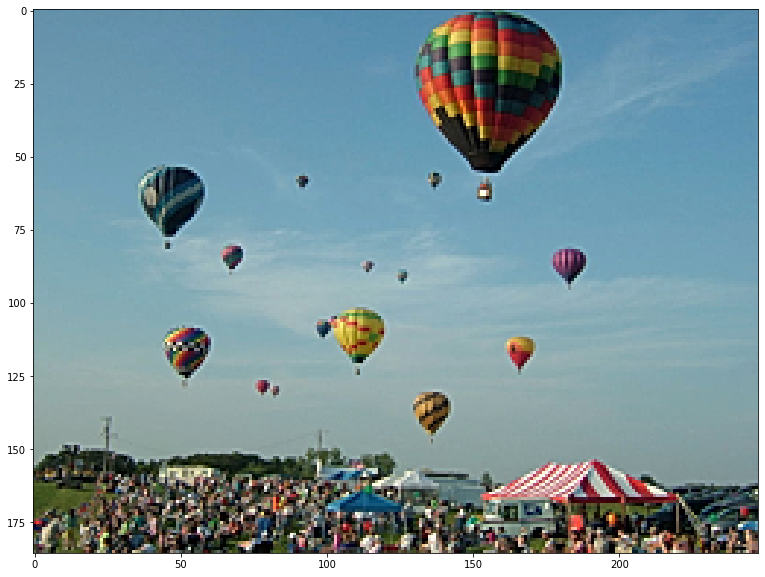

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(image,interpolation='nearest')

In [ ]:
!python main_train.py --input_name {image_name} --num_layer 3 --niter 500

Random Seed:  5905
8
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
  )
  (tail): Sequential(
    (0): Conv2d(32, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): Tanh()
  )
)
WDiscriminator(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32,

Get address address:

In [ ]:
scale_factor = os.listdir('TrainedModels/' + image_name[:-4])[0]
model_address = 'TrainedModels/' + image_name[:-4] + '/' + scale_factor + '/'
print('Model address = ', model_address)

Model address =  TrainedModels/balloons/scale_factor=0.750000,alpha=10/


### random samples generated by each scale:

In [ ]:
level = 8

In [ ]:
image_random = model_address+'/' + str(level) + '/fake_sample.png'
image = imread(image_random)

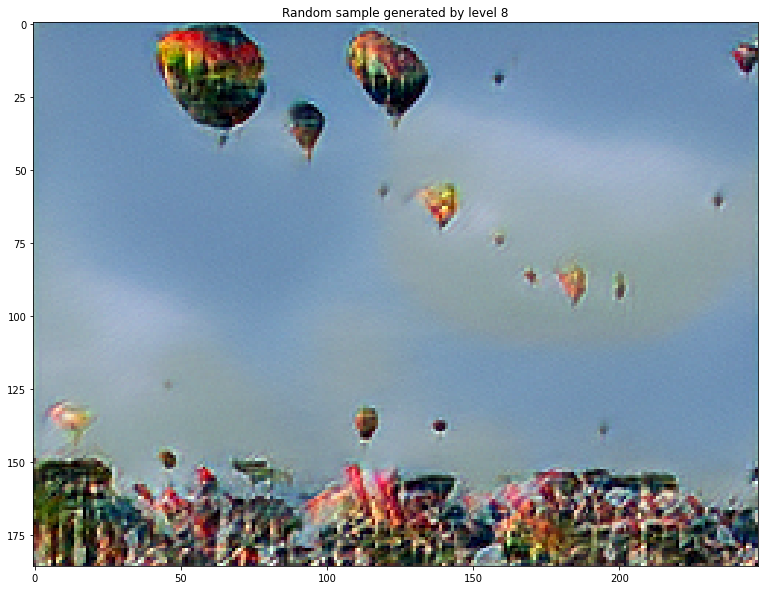

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Random sample generated by level ' + str(level))
plt.imshow(image,interpolation='nearest')

## Saving model as .zip

In [ ]:
try:
  !zip -r TrainedModels/{image_name[:-4] + '.zip'}  TrainedModels/{image_name[:-4]}
  clear_output(wait=True)
  print('model saved!')
except:
  print('problem saving model')


updating: TrainedModels/balloons/ (stored 0%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/ (stored 0%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/2/ (stored 0%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/2/G(z_opt).png (stored 0%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/2/real_scale.png (stored 0%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/2/z_opt.pth (deflated 99%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/2/fake_sample.png (stored 0%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/2/netD.pth (deflated 9%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/2/netG.pth (deflated 9%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/Gs.pth (deflated 9%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/0/ (stored 0%)
updating: TrainedModels/balloons/scale_factor=0.750000,alpha=10/0/G(z_opt).png (stored 

# 3. Inpainting with SinGans

First choose an image and a mask to work with

In [45]:
image_name = '4.png'
mask_name = 'mask2.png'
image = cv2.imread('Input/Inpainting/Images/' + image_name)
mask = cv2.imread('Input/Inpainting/Masks/' + mask_name,0)

In [10]:
mask = cv2.bitwise_not(mask)

In [11]:
masked_image = cv2.bitwise_and(image,image,mask = mask)

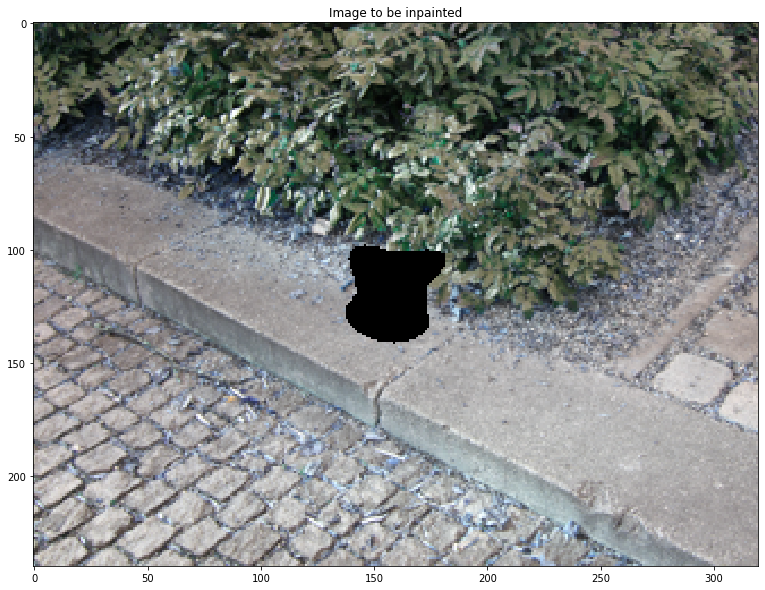

In [12]:
plt.figure(figsize=(20,10))
plt.title('Image to be inpainted')
plt.imshow(masked_image,interpolation='nearest')

In [22]:
inp_image = 'masked_image2.png'
masked_image_address = 'Input/Images/' + inp_image
cv2.imwrite(masked_image_address, masked_image)

True

## 3.1 Inpainting with editing

In [24]:
# train with less number of layers and number of iterations for faster speed
!python main_train.py --input_name {inp_image} --num_layer 3 --niter 500

Random Seed:  1085
8
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
  )
  (tail): Sequential(
    (0): Conv2d(32, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): Tanh()
  )
)
WDiscriminator(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32,

Save the model if needed

In [35]:
try:
  !zip -r TrainedModels/{inp_image[:-4] + '.zip'}  TrainedModels/{inp_image[:-4]}
  clear_output(wait=True)
  print('model saved!')
except:
  print('problem saving model')


model saved!


Let's plot a random sample generated on the training image:

In [26]:
scale_factor = os.listdir('TrainedModels/' + inp_image[:-4])[0]
model_address = 'TrainedModels/' + inp_image[:-4] + '/' + scale_factor + '/'
print('Model address = ', model_address)

Model address =  TrainedModels/masked_image2/scale_factor=0.750000,alpha=10/


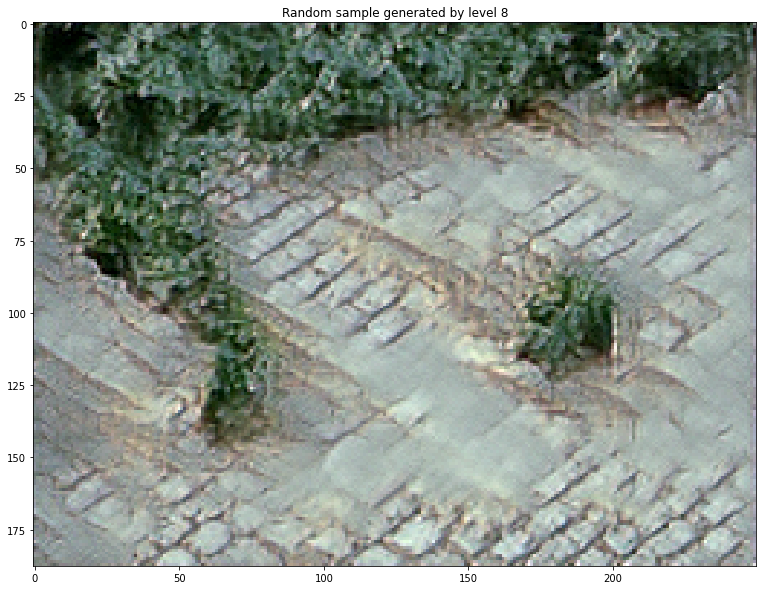

In [44]:
level = 8
image_random = model_address+'/' + str(level) + '/fake_sample.png'
image_sample = imread(image_random)
plt.figure(figsize=(20,10))
plt.title('Random sample generated by level ' + str(level))
plt.imshow(image_sample,interpolation='nearest')

We can see that the hole was not reproduced! Let's apply editing to the original image:

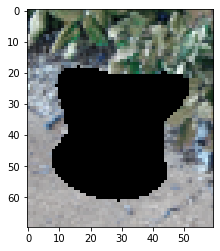

In [56]:
# position of mask
crop_img = masked_image[80:150,130:190,:]
plt.imshow(crop_img)

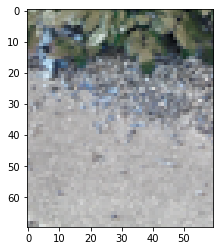

In [62]:
# position of replacement
dx = 50
dy = 30
crop_img = masked_image[80+dy:150+dy,130+dx:190+dx,:]
plt.imshow(crop_img)

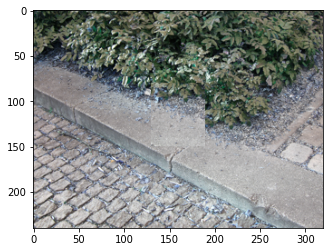

In [88]:
# substitute with other part of image and generate the mask
edited_image = masked_image.copy()
edited_image[80:150,130:190,:] = masked_image[80+dy:150+dy,130+dx:190+dx,:]
plt.imshow(edited_image)

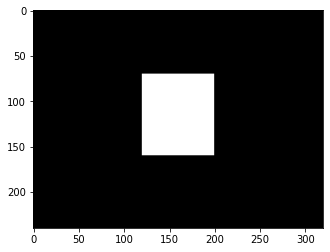

In [118]:
new_mask = masked_image.copy()
new_mask[:,:,:] = 0
d_w = 10
new_mask[80-d_w:150+d_w,130-d_w:190+d_w,:] = 255
plt.imshow(new_mask)

In [119]:
edited_image_name = 'edited_' + inp_image
edited_image_address = 'Input/Editing/' + edited_image_name
cv2.imwrite(edited_image_address, edited_image)

new_mask_name = 'edited_mask' + inp_image 
new_mask_address = 'Input/Editing/' + edited_image_mask[:-4] + '_mask.png'
cv2.imwrite(new_mask_address, new_mask)

True

Finally, let's apply the editing feature to this new image

In [120]:
injection_scale = 4

In [121]:
!python editing.py --input_name {inp_image} --ref_name {new_mask_name} --editing_start_scale {injection_scale}


Random Seed:  88
Traceback (most recent call last):
  File "editing.py", line 61, in <module>
    out = SinGAN_generate(Gs[n:], Zs[n:], reals, NoiseAmp[n:], opt, in_s, n=n, num_samples=1)
  File "/content/recvis/SinGAN/manipulate.py", line 131, in SinGAN_generate
    z_in = noise_amp*(z_curr)+I_prev
RuntimeError: The size of tensor a (98) must match the size of tensor b (102) at non-singleton dimension 3


## 3.2 Inpaiting with modified version of SinGans

In [ ]:
#!python main_train_inpainting.py --input_name image_name --input_name_mask mask_name --num_layer 4 --niter 400

In [ ]:
!python main_train_inpainting.py --input_name masked_image2.png --input_name_mask mask1.png --num_layer 4 --niter 400


Random Seed:  5249
(240, 320, 3)
(240, 320, 3)
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
  )
  (tail): Sequential(
    (0): Conv2d(32, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): Tanh()
  )
)
WDiscriminator(
  (head): ConvBlock(
    (conv): Con

In [ ]:
scale_factor = os.listdir('TrainedModels/' + inp_image[:-4])[0]
model_address = 'TrainedModels/' + inp_image[:-4] + '/' + scale_factor + '/'
print('Model address = ', model_address)

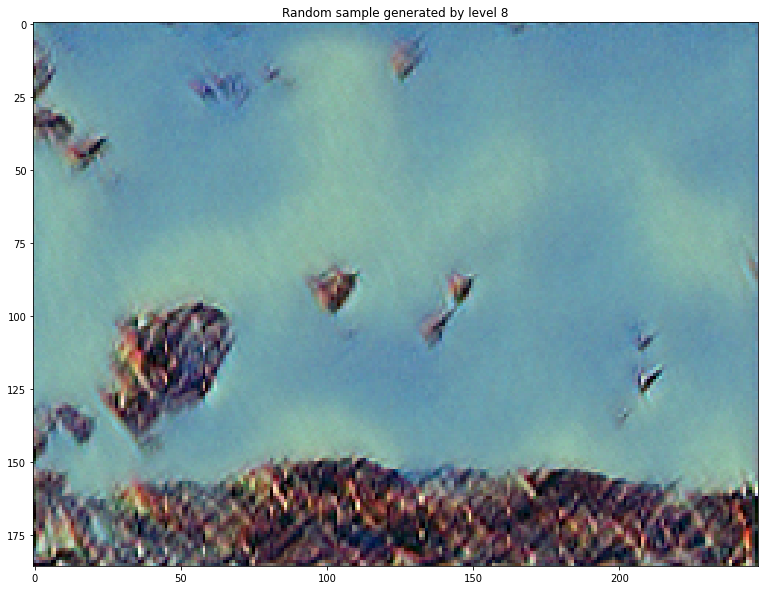

In [ ]:
level = 8
image_random = model_address+'/' + str(level) + '/fake_sample.png'
image = imread(image_random)
plt.figure(figsize=(20,10))
plt.title('Random sample generated by level ' + str(level))
plt.imshow(image,interpolation='nearest')

## download the model

In [ ]:
!rm -rf <TrainedModels>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `rm -rf <TrainedModels>'


In [ ]:
!zip -r TrainedModels/1mask2.zip  TrainedModels/1mask2

	zip warning: name not matched: TrainedModels/1mask2

zip error: Nothing to do! (try: zip -r TrainedModels/1mask2.zip . -i TrainedModels/1mask2)


In [ ]:
files.download("TrainedModels/1mask2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python random_samples.py --input_dir Input/Inpainting/Images --input_name 1mask2.png  --mode random_samples --gen_start_scale 8


Random Seed:  6176
Traceback (most recent call last):
  File "random_samples.py", line 40, in <module>
    Gs, Zs, reals, NoiseAmp = functions.load_trained_pyramid(opt)
  File "/content/recvis/SinGAN/functions.py", line 245, in load_trained_pyramid
    Gs = torch.load('%s/Gs.pth' % dir)
  File "/usr/local/lib/python3.6/dist-packages/torch/serialization.py", line 525, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.6/dist-packages/torch/serialization.py", line 212, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.6/dist-packages/torch/serialization.py", line 193, in __init__
    super(_open_file, self).__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'TrainedModels/1mask2/scale_factor=0.750000,alpha=10/Gs.pth'


In [ ]:
!zip -r Output/RandomSamples/1mask2.zip  Output/RandomSamples/1mask2

  adding: Output/RandomSamples/1mask2/ (stored 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/ (stored 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/0.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/20.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/18.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/32.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/39.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/8.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/12.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/40.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/6.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/10.png (deflated 0%)
  adding: Output/RandomSamples/1mask2/gen_start_scale=2/24.png (deflated 0%)
  adding: Output/RandomSamples/1mask

In [ ]:
files.download("Output/RandomSamples/1mask2.zip")

FileNotFoundError: ignored